In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0.post1 requires keras<2.16,>=2.15.0, but you have keras 3.0.2 which is incompatible.


In [ ]:
!pip uninstall tensorflow
!pip install tensorflow

Found existing installation: tensorflow 2.15.0.post1
Uninstalling tensorflow-2.15.0.post1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.post1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.15.0.post1
  Using cached tensorflow-2.15.0.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.2
    Uninstalling keras-3.0.2:
      Successfully uninstalled keras-3.0.2


In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

  Using cached keras-3.0.2-py3-none-any.whl (1.0 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0.post1 requires keras<2.16,>=2.15.0, but you have keras 3.0.2 which is incompatible.


In [ ]:
from keras.layers import Input, Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import DenseNet121
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Input, GlobalAveragePooling2D, Flatten, BatchNormalization, Dense, Dropout
from keras.models import Model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import PIL
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard
import time
import cv2
import glob
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from keras.models import load_model
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, auc
from keras.layers import concatenate
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


In [ ]:
# Specify the path to your data in Google Drive
base_path = '/content/drive/MyDrive/chest_xray new data'




#**2) Loading Data**

In [ ]:
# Update the paths accordingly
train_data = glob.glob(os.path.join(base_path, 'train/**/*.jpeg'))
test_data = glob.glob(os.path.join(base_path, 'test/**/*.jpeg'))
val_data = glob.glob(os.path.join(base_path, 'val/**/*.jpeg'))

print(f"Training Set has: {len(train_data)} images")
print(f"Testing Set has: {len(test_data)} images")
print(f"Validation Set has: {len(val_data)} images")

Training Set has: 1644 images
Testing Set has: 624 images
Validation Set has: 16 images


In [ ]:
def plot_multiple_img(img_matrix_list, title_list, ncols, main_title=""):
    # Set up the figure and axes for subplots
    fig, myaxes = plt.subplots(figsize=(20, 15), nrows=(len(img_matrix_list) // ncols) + 1, ncols=ncols, squeeze=False)

    # Adjust layout
    fig.suptitle(main_title, fontsize=30)
    fig.subplots_adjust(wspace=0.3)
    fig.subplots_adjust(hspace=0.3)

    # Enumerate through the images and titles
    for i, (img, title) in enumerate(zip(img_matrix_list, title_list)):
        row = i // ncols
        col = i % ncols
        myaxes[row, col].imshow(img)
        myaxes[row, col].set_title(title, fontsize=15)

    # Remove empty subplots if any
    for i in range(len(img_matrix_list), len(myaxes.flatten())):
        fig.delaxes(myaxes.flatten()[i])

    plt.show()

#**3) Data Distribution**

In [ ]:
sets = ["train", "test", "val"]
all_pneumonia = []
all_normal = []

for cat in sets:
    path = os.path.join(base_path, cat)
    norm = glob.glob(os.path.join(path, "NORMAL/*.jpeg"))
    pneu = glob.glob(os.path.join(path, "PNEUMONIA/*.jpeg"))
    all_normal.extend(norm)
    all_pneumonia.extend(pneu)

print(f"Total Pneumonia Images: {len(all_pneumonia)}")
print(f"Total Normal Images: {len(all_normal)}")

Total Pneumonia Images: 1496
Total Normal Images: 788


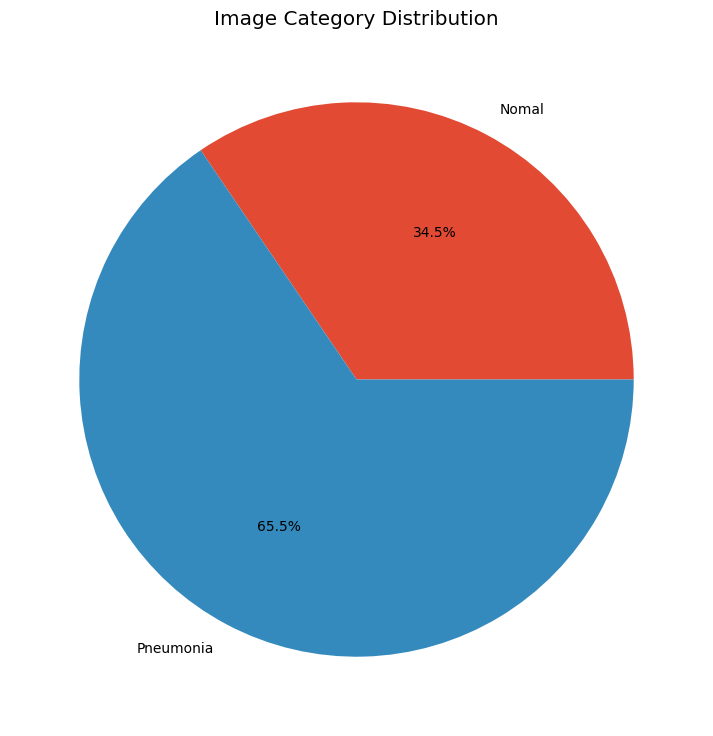

In [ ]:
labels = ['Nomal', 'Pneumonia']
targets = [len(all_normal), len(all_pneumonia)]

plt.style.use("ggplot")
plt.figure(figsize=(16, 9))
plt.pie(x=targets, labels=labels, autopct="%1.1f%%")
plt.title("Image Category Distribution")
plt.show()

#**4) EDA**

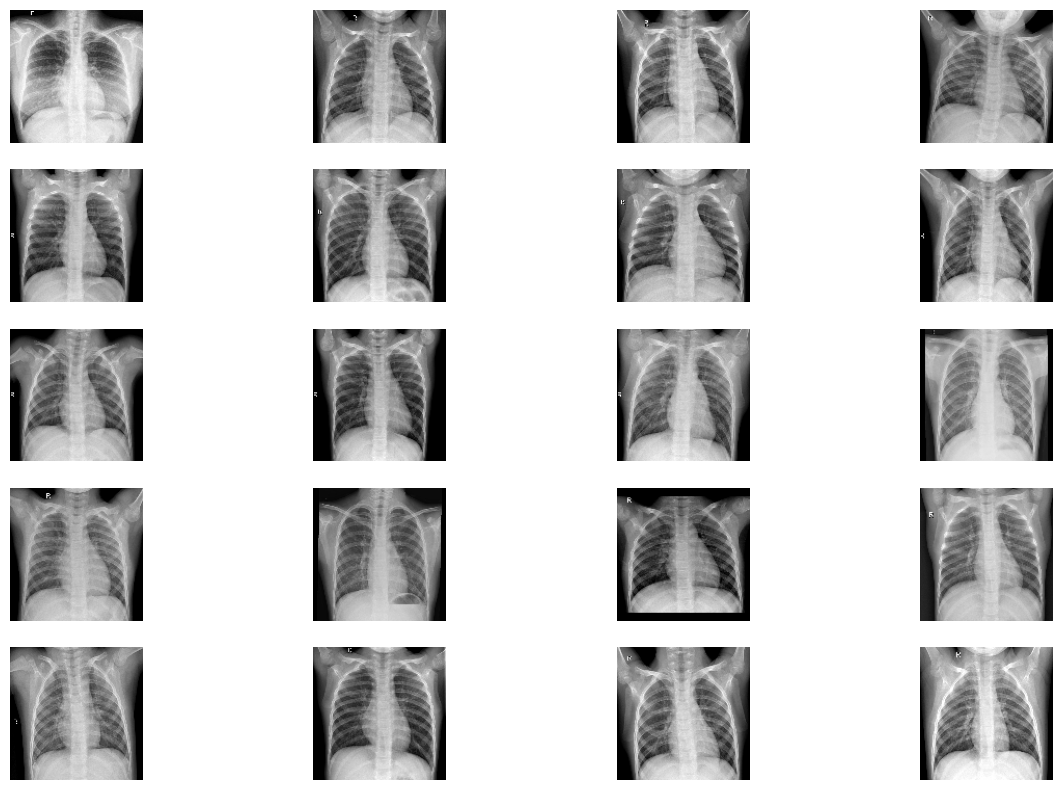

In [ ]:
# Shuffle the images randomly
random.shuffle(all_normal)
random.shuffle(all_pneumonia)

# Select a subset of images for visualization
images = all_normal[:50] + all_pneumonia[:50]

# Viewing the images in X-ray
fig = plt.figure(figsize=(15, 10))
columns = 4
rows = 5

for i in range(1, columns * rows + 1):
    img_path = images[i]
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))

    fig.add_subplot(rows, columns, i)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
    plt.axis(False)

plt.show()

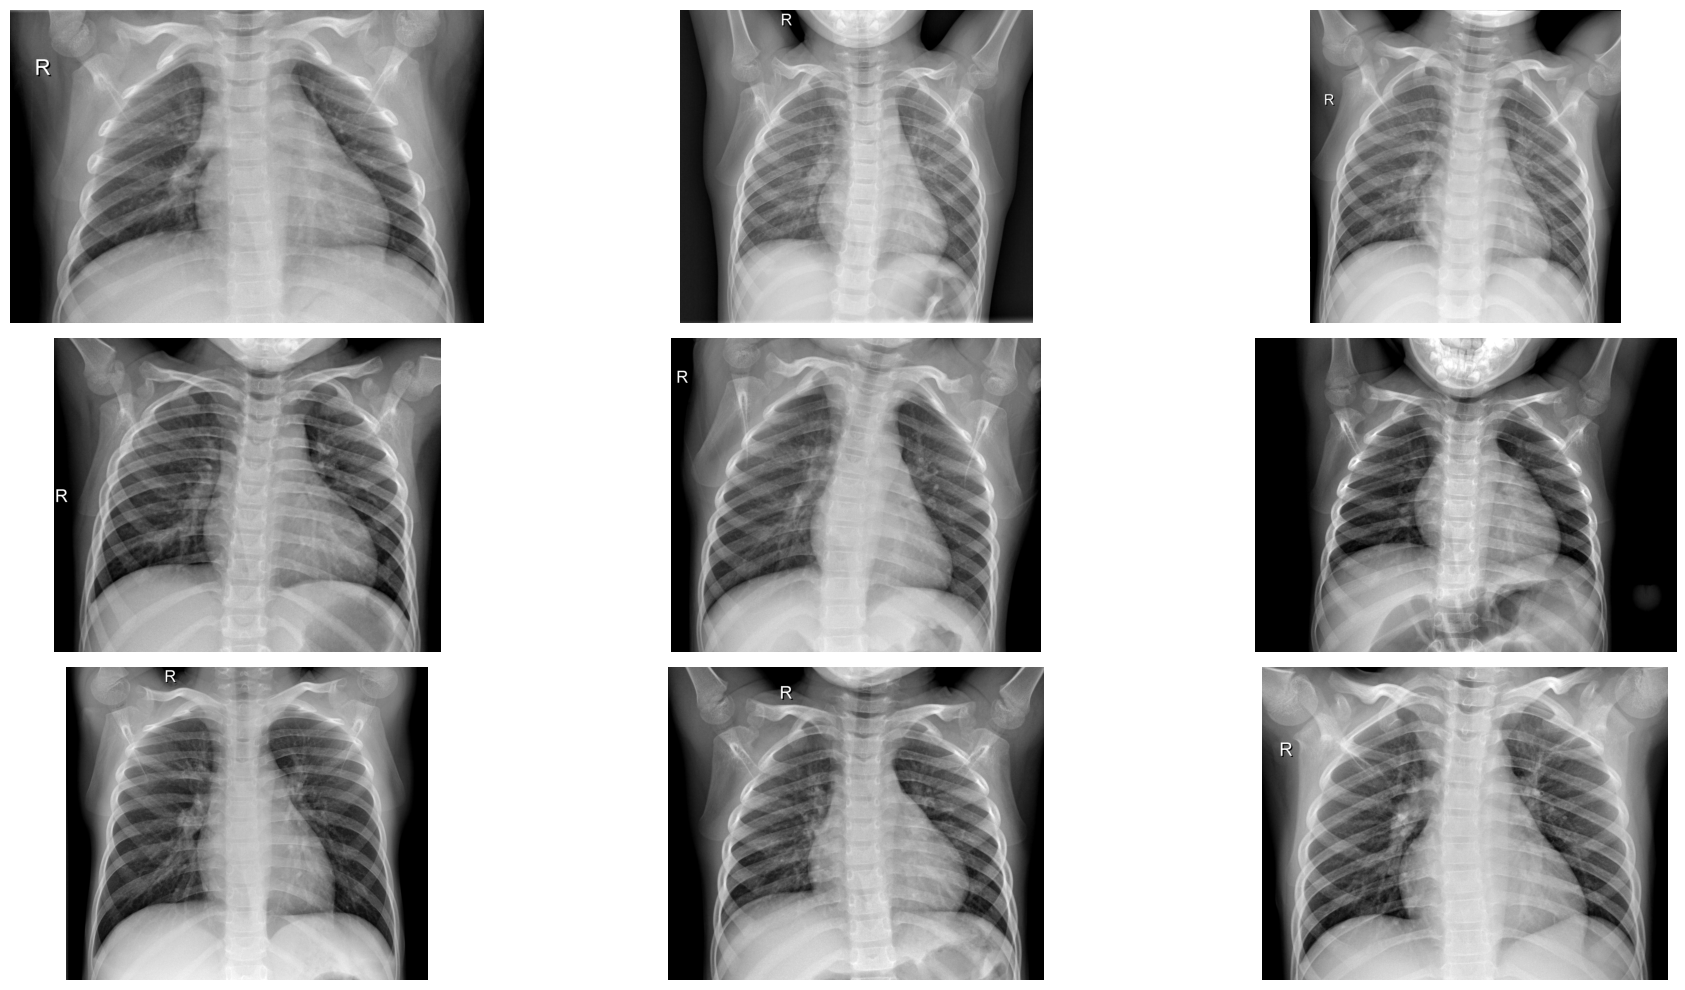

In [ ]:
normal = os.listdir("/content/drive/MyDrive/chest_xray new data/train/NORMAL")
normal_dir = "/content/drive/MyDrive/chest_xray new data/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

The dimensions of the image are 1306 pixels width and 1974 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 130.3817 and the standard deviation is 57.0892


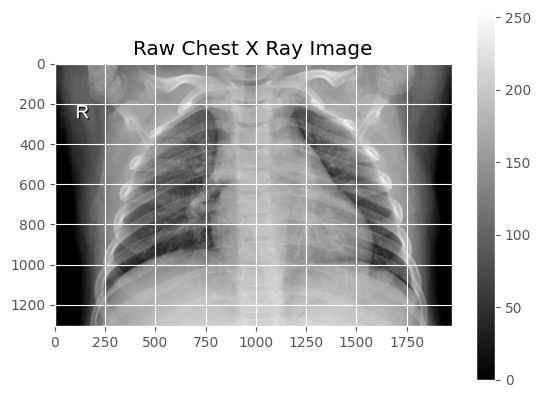

In [ ]:
normal_img = os.listdir("/content/drive/MyDrive/chest_xray new data/train/NORMAL")[0]
normal_dir = "/content/drive/MyDrive/chest_xray new data/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

<ipython-input-11-d45ac08d2db9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_img.ravel(),


Text(0, 0.5, '# Pixels in Image')

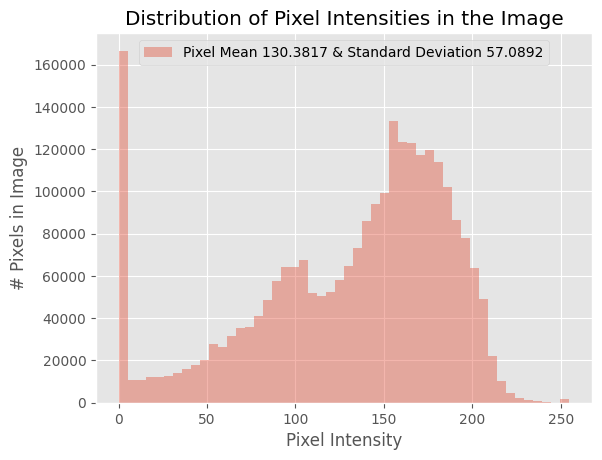

In [ ]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

 **let’s try Ben Graham’s method. First, we convert the images to greyscale and then apply Gaussian blur to them.**

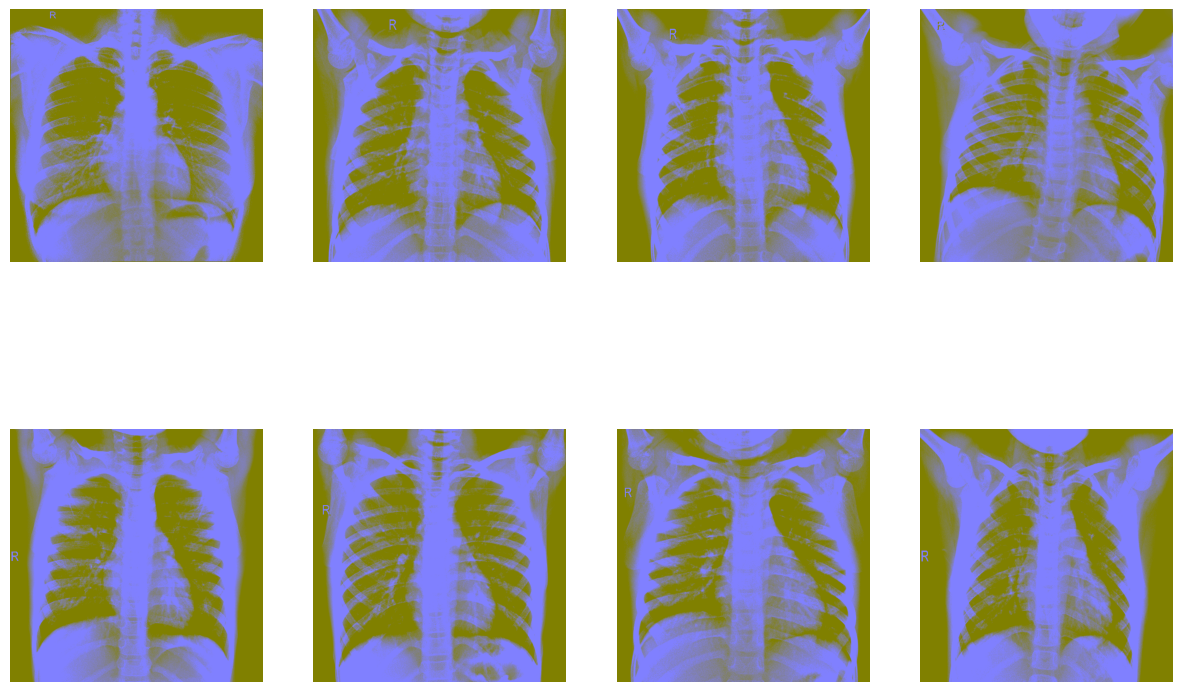

In [ ]:
fig=plt.figure(figsize=(15, 10))
columns = 4; rows = 2
for i in range(1, columns*rows +1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 512/10), -4, 128)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis(False)

 **let’s look into the pixel distributions. We’ll use the Fourier method for this.**

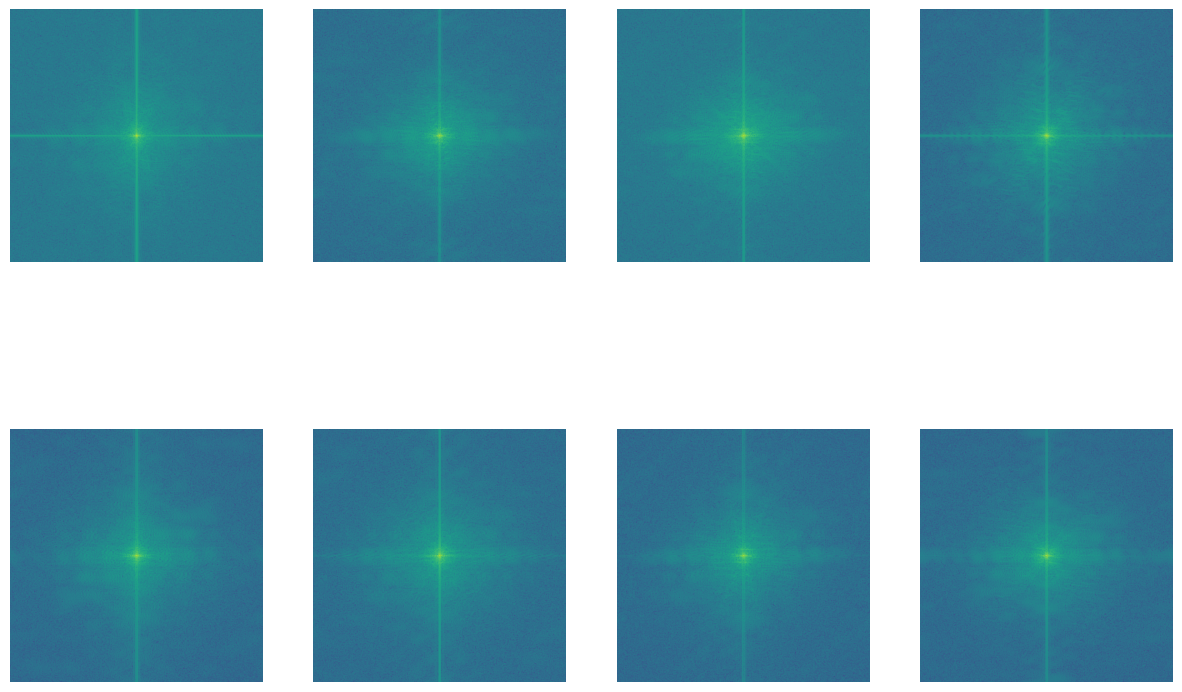

In [ ]:
fig=plt.figure(figsize=(15, 10))
columns = 4; rows = 2
for i in range(1, columns*rows +1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    fig.add_subplot(rows, columns, i)
    plt.imshow(magnitude_spectrum)
    plt.axis(False)

**Image Erosion:**

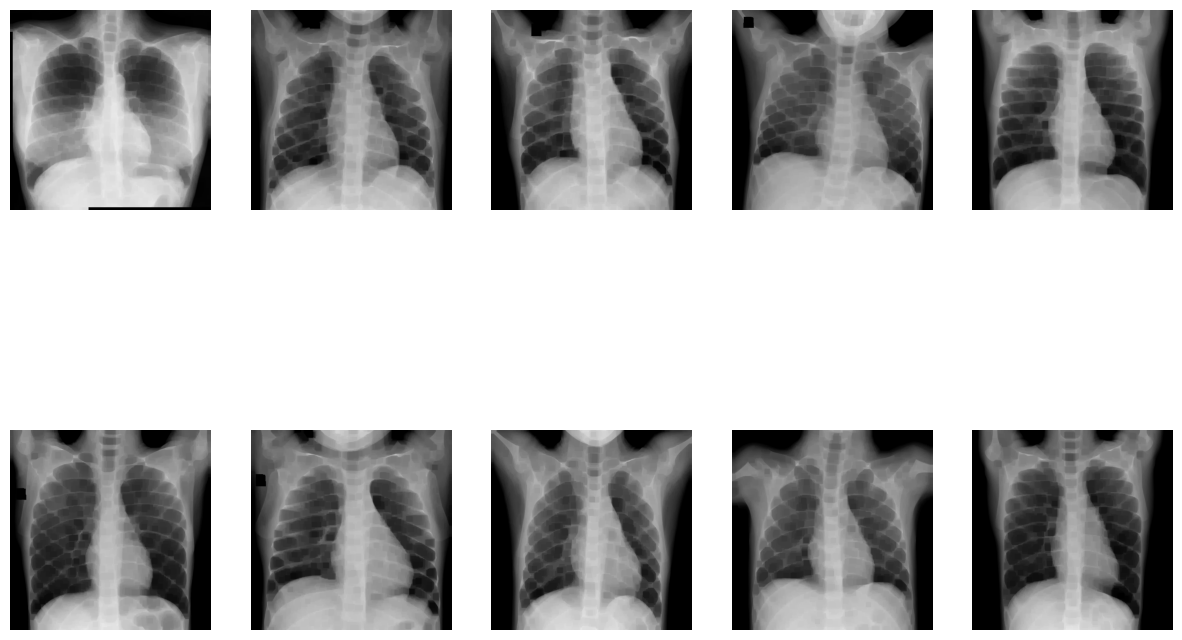

In [ ]:
fig=plt.figure(figsize=(15, 10))
columns = 5; rows = 2
for i in range(1, columns*rows +1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    img_erosion = cv2.erode(img, kernel, iterations=3)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_erosion)
    plt.axis(False)

**Dilation of Images**

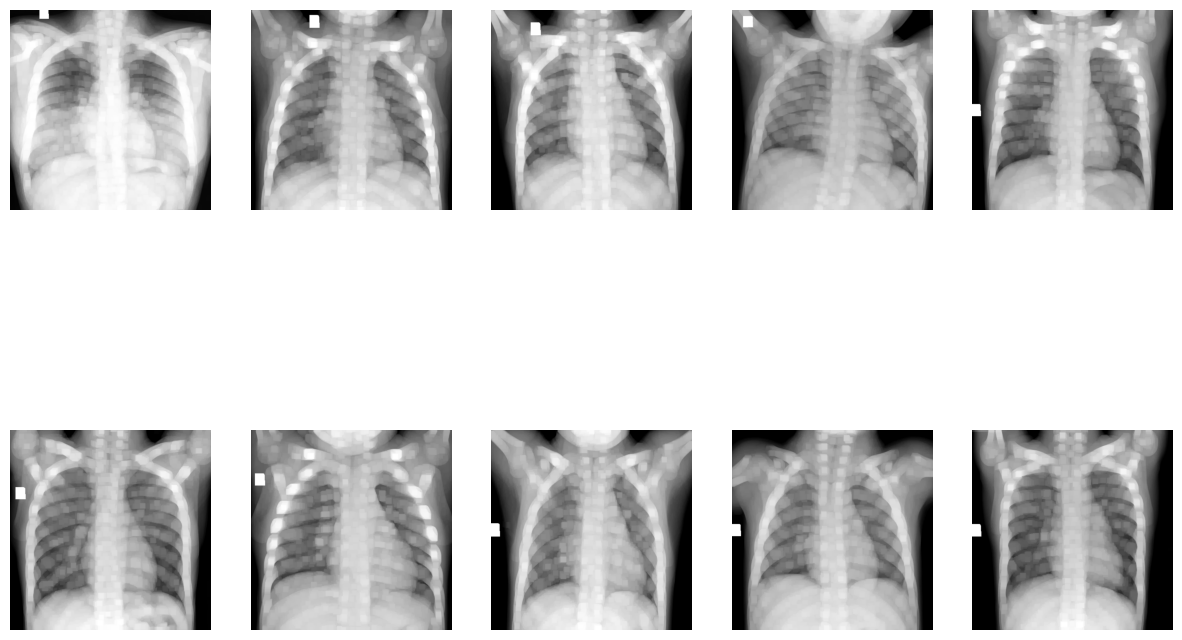

In [ ]:
fig=plt.figure(figsize=(15, 10))
columns = 5; rows = 2
for i in range(1, columns*rows +1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    img_erosion = cv2.dilate(img, kernel, iterations=3)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_erosion)
    plt.axis(False)

**OpenCV’s Canny Edge Detection:**

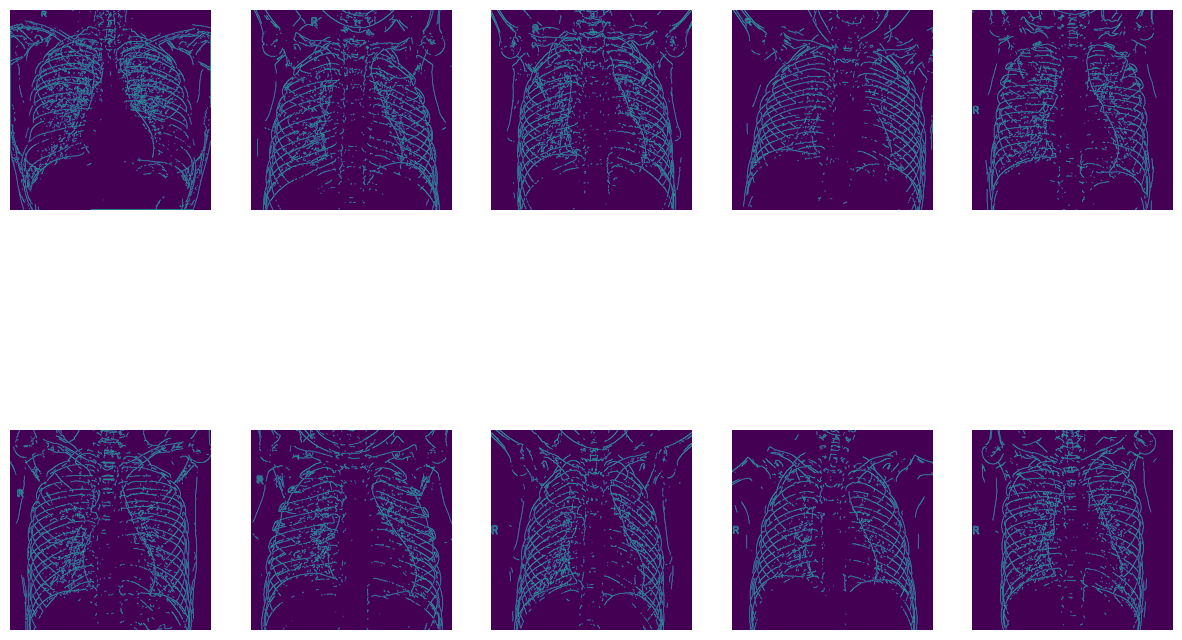

In [ ]:
fig=plt.figure(figsize=(15, 10))
columns = 5; rows = 2
for i in range(1, columns*rows +1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(img, 80, 100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(edges)
    plt.axis(False)

#**5) Model Building**

In [ ]:
# Define ImageDataGenerators for training and validation
train_gen = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.2,
    zoom_range=0.2
)

val_gen = ImageDataGenerator(
    rescale=1/255.,
)

# Flowing the data in the Data Generator
Train = train_gen.flow_from_directory(
    os.path.join(base_path, 'train'),
    target_size=(180, 180),
    batch_size=32,
    class_mode='binary'
)

Test = val_gen.flow_from_directory(
    os.path.join(base_path, 'test'),
    target_size=(180, 180),
    batch_size=32,
    class_mode='binary'
)

Found 1644 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Train set:
PNEUMONIA=1098
NORMAL=546
Test set:
PNEUMONIA=390
NORMAL=234
Validation set:
PNEUMONIA=8
NORMAL=8


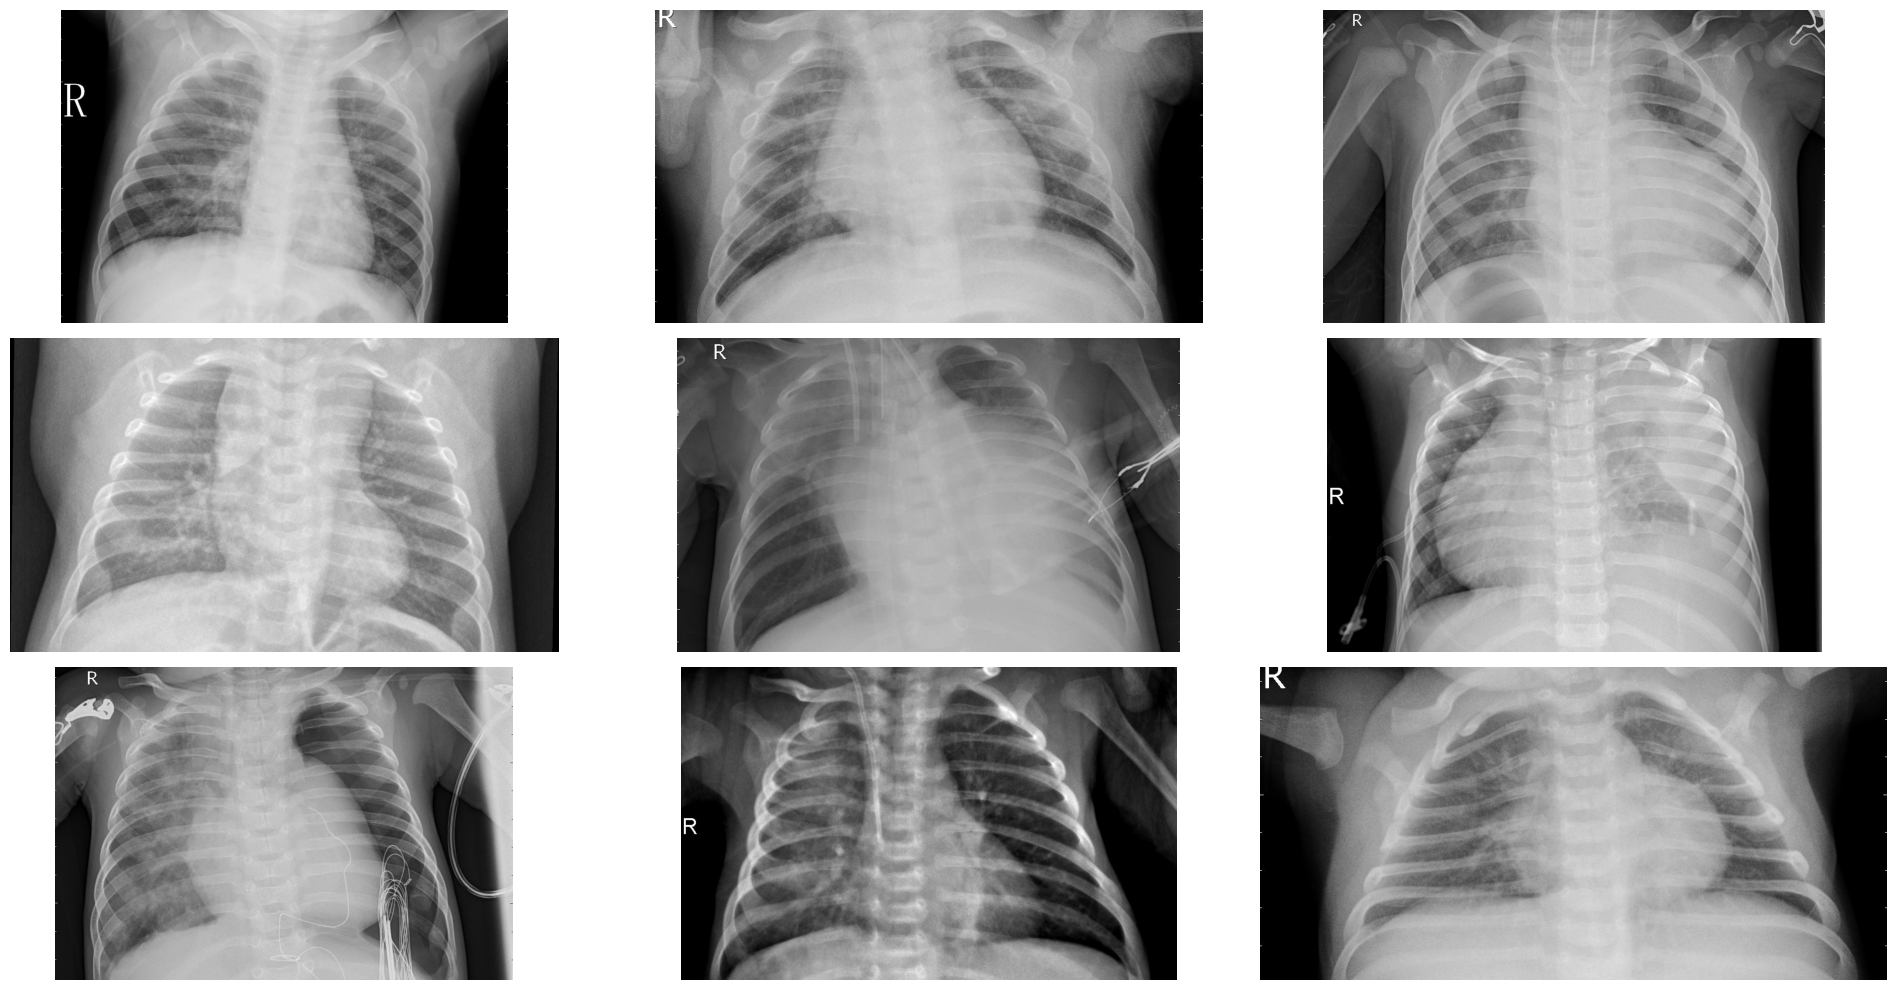

In [ ]:
train_dir = "/content/drive/MyDrive/chest_xray new data/train"
test_dir = "/content/drive/MyDrive/chest_xray new data/test"
val_dir = "/content/drive/MyDrive/chest_xray new data/val"

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

pneumonia = os.listdir("/content/drive/MyDrive/chest_xray new data/train/PNEUMONIA")
pneumonia_dir = "/content/drive/MyDrive/chest_xray new data/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

In [ ]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.67
Weight for class 1: 0.33


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/My Drive/best_model.h5', monitor='val_loss', save_best_only=True)

In [ ]:
# Train the model with callbacks
r = model.fit(
    Train,
    epochs=10,
     validation_data=Test,
    class_weight=class_weight,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 0.9180 - accuracy: 0.8479

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 391s 7s/step - loss: 0.9180 - accuracy: 0.8479 - val_loss: 10.5773 - val_accuracy: 0.6250
Epoch 2/10
52/52 [==============================] - 45s 869ms/step - loss: 0.1338 - accuracy: 0.9021 - val_loss: 36.0545 - val_accuracy: 0.6250
Epoch 3/10
52/52 [==============================] - 48s 927ms/step - loss: 0.0925 - accuracy: 0.9264 - val_loss: 48.7912 - val_accuracy: 0.6250
Epoch 4/10
52/52 [==============================] - 45s 868ms/step - loss: 0.0909 - accuracy: 0.9191 - val_loss: 22.9198 - val_accuracy: 0.6250


In [ ]:
# Load the best model
model = load_model('/content/drive/MyDrive/best_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(Test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

20/20 [==============================] - 8s 385ms/step - loss: 10.5773 - accuracy: 0.6250
Test accuracy: 62.50%


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 178, 178, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 176, 176, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 88, 32)        0         
 D)                                                              
                                                        

In [ ]:
model = load_model('/content/drive/MyDrive/best_model.h5')

In [ ]:
# Predict on the test set
y_pred = model.predict(Test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

20/20 [==============================] - 10s 512ms/step


In [ ]:
# Calculate additional metrics
accuracy = accuracy_score(Test.classes, y_pred_binary)
precision = precision_score(Test.classes, y_pred_binary)
recall = recall_score(Test.classes, y_pred_binary)
auc_value = roc_auc_score(Test.classes, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"AUC:{auc_value*100:.2f}%")

Accuracy: 62.50%
Precision: 62.50%
Recall: 100.00%
AUC:50.00%


Text(0.5, 1.0, 'Accuracy Evolution')

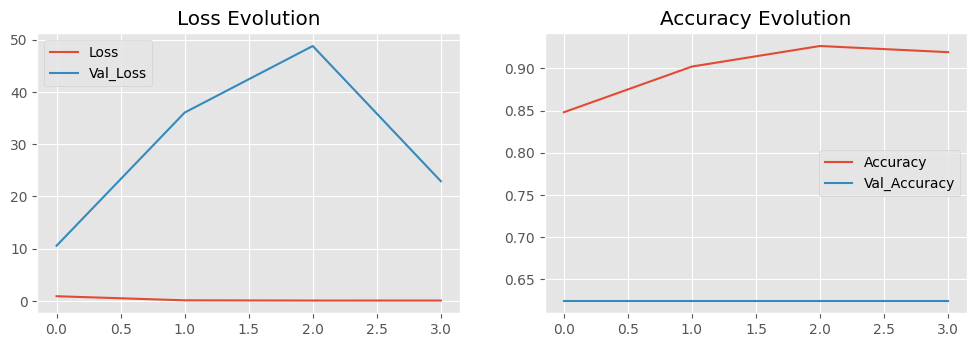

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming Test is your test dataset and y_pred is your model predictions
print(confusion_matrix(Test.classes, y_pred > 0.5))
print(classification_report(Test.classes, y_pred > 0.5))

[[  0 234]
 [  0 390]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


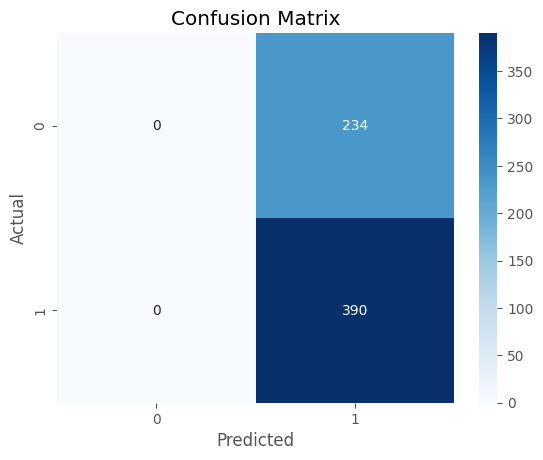

In [ ]:
# Confusion matrix values
conf_matrix = np.array([[0, 234],
                        [0, 390]])

# Plotting
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Assuming Test is your test dataset and y_pred is your model predictions
print(confusion_matrix(Test.classes, y_pred > 0.7))
print(classification_report(Test.classes, y_pred > 0.7))

[[201  33]
 [337  53]]
              precision    recall  f1-score   support

           0       0.37      0.86      0.52       234
           1       0.62      0.14      0.22       390

    accuracy                           0.41       624
   macro avg       0.49      0.50      0.37       624
weighted avg       0.53      0.41      0.33       624



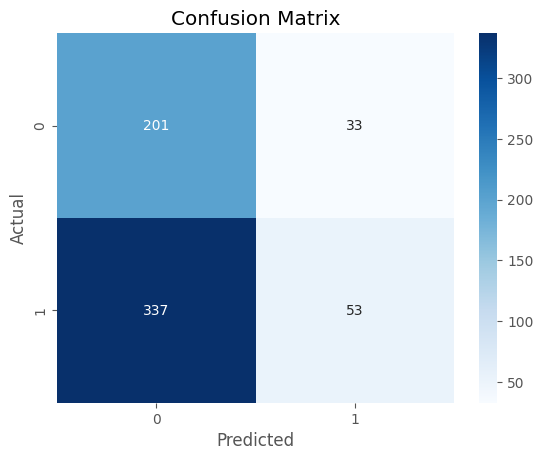

In [ ]:
# Confusion matrix values
conf_matrix = np.array([[201, 33],
                        [337, 53]])

# Plotting
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**DenseNet121**

In [ ]:
base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

29084464/29084464 [==============================] - 2s 0us/step


In [ ]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [ ]:
print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The input shape KerasTensor(type_spec=TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
The output shape KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")


In [ ]:
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
#model.add(base_model)
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/My Drive/best_model_densnet121.h5', monitor='val_loss', save_best_only=True)

In [ ]:
d = model.fit(
    Train,
    epochs=10,
    validation_data=Test,
    class_weight=class_weight,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 0.1026 - accuracy: 0.9142

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 141s 1s/step - loss: 0.1026 - accuracy: 0.9142 - val_loss: 6.5019 - val_accuracy: 0.6891
Epoch 2/10
52/52 [==============================] - 51s 977ms/step - loss: 0.0465 - accuracy: 0.9672 - val_loss: 1.0175 - val_accuracy: 0.7276
Epoch 3/10
52/52 [==============================] - 52s 997ms/step - loss: 0.0450 - accuracy: 0.9647 - val_loss: 7.4740 - val_accuracy: 0.3974
Epoch 4/10
52/52 [==============================] - 48s 932ms/step - loss: 0.0432 - accuracy: 0.9617 - val_loss: 2.6033 - val_accuracy: 0.6250
Epoch 5/10
52/52 [==============================] - 49s 942ms/step - loss: 0.0369 - accuracy: 0.9653 - val_loss: 1.1159 - val_accuracy: 0.8269


In [ ]:
# Load the best model
model_densnet121 = load_model('/content/drive/MyDrive/best_model_densnet121.h5')

# Evaluate the model on the test set
loss, accuracy = model_densnet121.evaluate(Test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

20/20 [==============================] - 12s 420ms/step - loss: 1.0175 - accuracy: 0.7276
Test accuracy: 72.76%


In [ ]:
model_densnet121.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, None, None, 3)        0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, None, None, 64)       9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1/conv[0][0]']      

Text(0.5, 1.0, 'Accuracy Evolution')

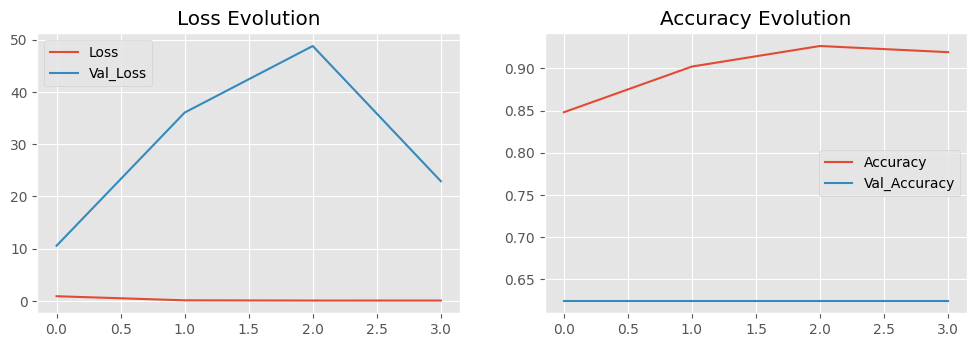

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
model_densnet121 = load_model('/content/drive/MyDrive/best_model_densnet121.h5')

In [ ]:
# Predict on the test set
y_pred = model_densnet121.predict(Test)
y_pred_binary = (y_pred > 0.5).astype(int)

20/20 [==============================] - 8s 308ms/step


In [ ]:
# Calculate additional metrics
accuracy = accuracy_score(Test.classes, y_pred_binary)
precision = precision_score(Test.classes, y_pred_binary)
recall = recall_score(Test.classes, y_pred_binary)
auc_value = roc_auc_score(Test.classes, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"AUC:{auc_value*100:.2f}%")

Accuracy: 48.40%
Precision: 60.83%
Recall: 48.97%
AUC:48.44%


In [ ]:
# Assuming Test is your test dataset and y_pred is your model predictions
print(confusion_matrix(Test.classes, y_pred > 0.5))
print(classification_report(Test.classes, y_pred > 0.5))

[[111 123]
 [199 191]]
              precision    recall  f1-score   support

           0       0.36      0.47      0.41       234
           1       0.61      0.49      0.54       390

    accuracy                           0.48       624
   macro avg       0.48      0.48      0.48       624
weighted avg       0.51      0.48      0.49       624



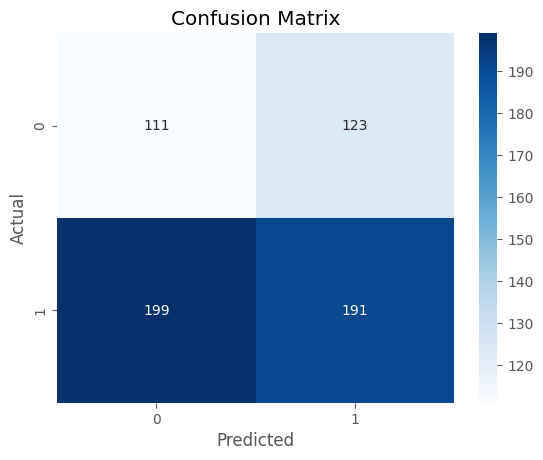

In [ ]:
# Confusion matrix values
conf_matrix = np.array([[111, 123],
                        [199, 191]])

# Plotting
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**vgg16**

In [ ]:
vgg16_base_model = VGG16(input_shape=(180,180,3),include_top=False,weights='imagenet')

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
vgg16_model = Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

model = Sequential()
model.add(vgg16_model.layers[0])

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

vgg16_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=METRICS)

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/My Drive/best_model_vgg16.h5', monitor='val_loss', save_best_only=True)

In [ ]:
v= vgg16_model.fit(Train,
          epochs=10,
          validation_data=Test,
          class_weight=class_weight,
          callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 0.2044 - accuracy: 0.7981 - precision: 0.9342 - recall: 0.7505

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 86s 1s/step - loss: 0.2044 - accuracy: 0.7981 - precision: 0.9342 - recall: 0.7505 - val_loss: 147.5465 - val_accuracy: 0.3750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
52/52 [==============================] - 50s 959ms/step - loss: 0.1681 - accuracy: 0.8534 - precision: 0.9404 - recall: 0.8333 - val_loss: 24.3525 - val_accuracy: 0.3750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
52/52 [==============================] - 51s 982ms/step - loss: 0.1508 - accuracy: 0.8637 - precision: 0.9459 - recall: 0.8443 - val_loss: 1200.2659 - val_accuracy: 0.3750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
52/52 [==============================] - 50s 957ms/step - loss: 0.1319 - accuracy: 0.8741 - precision: 0.9523 - recall: 0.8543 - val_loss: 10.7384 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 5/10
52/52 [==============================] - 52s 994ms/step - loss: 0.1240 -

In [ ]:
# Load the best model
model_vgg16 = load_model('/content/drive/MyDrive/best_model_vgg16.h5')

# Evaluate the model on the test set
evaluation = model_vgg16.evaluate(Test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")


20/20 [==============================] - 8s 348ms/step - loss: 0.9063 - accuracy: 0.6747 - precision: 0.9795 - recall: 0.4897
Test Accuracy: 67.47%


In [ ]:
model_vgg16.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, None, None, 3)        0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, None, None, 64)       9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1/conv[0][0]']      

Text(0.5, 1.0, 'Accuracy Evolution')

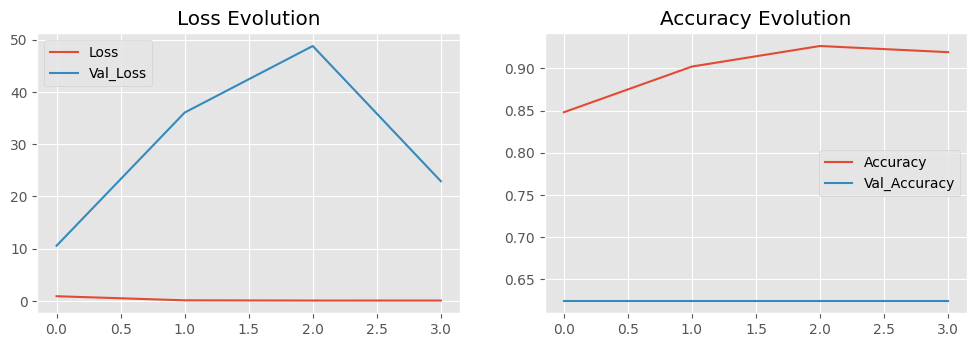

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
model_vgg = load_model('/content/drive/MyDrive/best_model_vgg16.h5')

In [ ]:
# Predict on the test set
y_pred = model_vgg.predict(Test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

20/20 [==============================] - 7s 313ms/step


In [ ]:
# Calculate additional metrics
accuracy = accuracy_score(Test.classes, y_pred_binary)
precision = precision_score(Test.classes, y_pred_binary)
recall = recall_score(Test.classes, y_pred_binary)
auc_value = roc_auc_score(Test.classes, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"AUC:{auc_value*100:.2f}%")

Accuracy: 45.99%
Precision: 63.59%
Recall: 31.79%
AUC:49.54%


In [ ]:
# Assuming Test is your test dataset and y_pred is your model predictions
print(confusion_matrix(Test.classes, y_pred > 0.5))
print(classification_report(Test.classes, y_pred > 0.5))

[[163  71]
 [266 124]]
              precision    recall  f1-score   support

           0       0.38      0.70      0.49       234
           1       0.64      0.32      0.42       390

    accuracy                           0.46       624
   macro avg       0.51      0.51      0.46       624
weighted avg       0.54      0.46      0.45       624



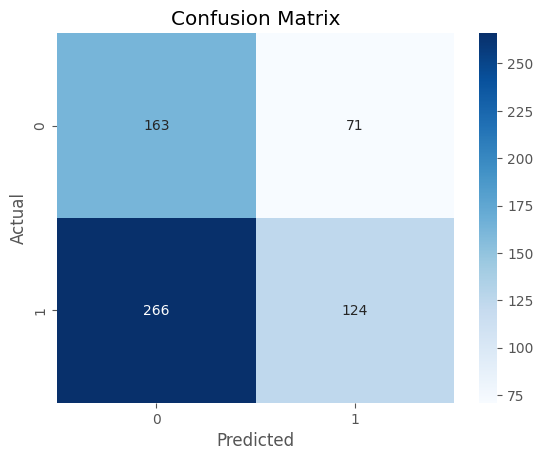

In [ ]:
# Confusion matrix values
conf_matrix = np.array([[163, 71],
                        [266, 124]])

# Plotting
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#**ResNet50**

In [ ]:
resnet_base_model = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
resnet_model = Sequential([
    resnet_base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
resnet_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=METRICS)


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/My Drive/best_model_resnet50.h5', monitor='val_loss', save_best_only=True)

In [ ]:
r = resnet_model.fit(Train,
          epochs=10,
          validation_data=Test,
          class_weight=class_weight,
         callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 0.1438 - accuracy: 0.8449 - precision: 0.9527 - recall: 0.8078

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 102s 1s/step - loss: 0.1438 - accuracy: 0.8449 - precision: 0.9527 - recall: 0.8078 - val_loss: 2.6942 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 2/10
52/52 [==============================] - 52s 1s/step - loss: 0.0789 - accuracy: 0.9367 - precision: 0.9761 - recall: 0.9281 - val_loss: 1.2274 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 3/10
52/52 [==============================] - 52s 989ms/step - loss: 0.0732 - accuracy: 0.9380 - precision: 0.9770 - recall: 0.9290 - val_loss: 11.0638 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 4/10
52/52 [==============================] - 53s 1s/step - loss: 0.0572 - accuracy: 0.9538 - precision: 0.9830 - recall: 0.9472 - val_loss: 5.5346 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 5/10
52/52 [==============================] - 48s 927ms/step - loss: 0.0606 - accuracy: 0.9556 - precision: 0.98

In [ ]:
# Load the best model
model_resnet50 = load_model('/content/drive/MyDrive/best_model_resnet50.h5')

# Evaluate the model on the test set
evaluation = model_resnet50.evaluate(Test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 7s 307ms/step - loss: 1.2274 - accuracy: 0.6250 - precision: 0.6250 - recall: 1.0000
Test Accuracy: 62.50%


In [ ]:
model_resnet50.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 6, 6, 2048)        23587712  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_7 (Dense)             (None, 512)               1049088   
                                                                 
 batch_normalization_9 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

Text(0.5, 1.0, 'Accuracy Evolution')

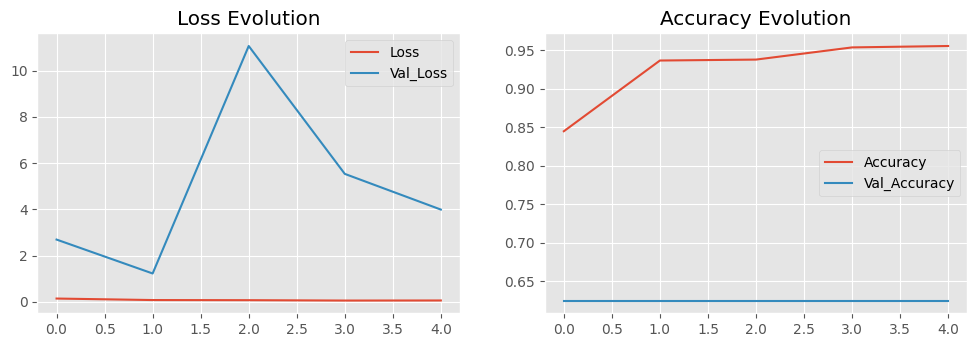

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
model_resnet = load_model('/content/drive/MyDrive/best_model_resnet50.h5')

In [ ]:
# Predict on test set
y_pred = model_resnet.predict(Test)

20/20 [==============================] - 7s 298ms/step


In [ ]:
# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:
# Calculate additional metrics
accuracy = accuracy_score(Test.classes, y_pred_binary)
precision = precision_score(Test.classes, y_pred_binary)
recall = recall_score(Test.classes, y_pred_binary)
auc_value = roc_auc_score(Test.classes, y_pred)

In [ ]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"AUC:{auc_value*100:.2f}%")

Accuracy: 62.50%
Precision: 62.50%
Recall: 100.00%
AUC:49.68%


In [ ]:
# Assuming Test is your test dataset and y_pred is your model predictions
print(confusion_matrix(Test.classes, y_pred > 0.5))
print(classification_report(Test.classes, y_pred > 0.5))

[[  0 234]
 [  0 390]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


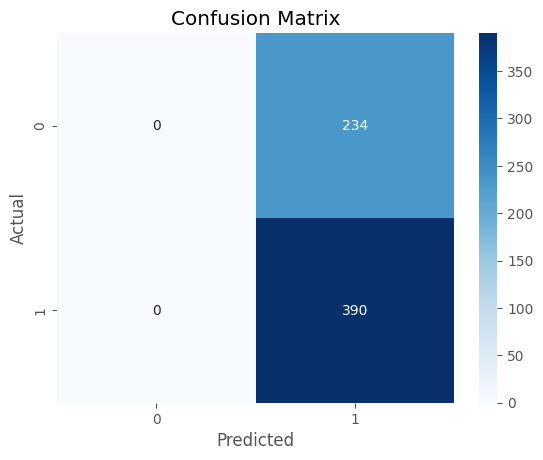

In [ ]:
# Confusion matrix values
conf_matrix = np.array([[0, 234],
                        [0, 390]])

# Plotting
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**InceptionNetv3**

In [ ]:
from keras.applications import InceptionV3

inception_base_model = InceptionV3(input_shape=(180,180,3),include_top=False,weights='imagenet')

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
inception_model = Sequential([
    inception_base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
inception_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=METRICS)


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/My Drive/best_model_InceptionV3.h5', monitor='val_loss', save_best_only=True)

In [ ]:
i = inception_model.fit(Train,
          epochs=10,
          validation_data=Test,
          class_weight=class_weight,
          callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 0.1936 - accuracy: 0.8127 - precision: 0.9055 - recall: 0.8033

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 102s 1s/step - loss: 0.1936 - accuracy: 0.8127 - precision: 0.9055 - recall: 0.8033 - val_loss: 2765.8872 - val_accuracy: 0.3750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
52/52 [==============================] - 51s 986ms/step - loss: 0.1044 - accuracy: 0.9227 - precision: 0.9673 - recall: 0.9153 - val_loss: 0.5175 - val_accuracy: 0.7179 - val_precision: 0.9053 - val_recall: 0.6128
Epoch 3/10
52/52 [==============================] - 51s 972ms/step - loss: 0.0911 - accuracy: 0.9367 - precision: 0.9698 - recall: 0.9344 - val_loss: 1.3005 - val_accuracy: 0.6442 - val_precision: 0.9941 - val_recall: 0.4333
Epoch 4/10
52/52 [==============================] - 46s 882ms/step - loss: 0.0952 - accuracy: 0.9221 - precision: 0.9700 - recall: 0.9117 - val_loss: 0.7881 - val_accuracy: 0.6474 - val_precision: 0.6446 - val_recall: 0.9718
Epoch 5/10
52/52 [==============================] - 49s 932ms/step - loss: 0.1292 - accuracy: 0.8990 -

In [ ]:
# Load the best model
model_inceptionv3 = load_model('/content/drive/MyDrive/best_model_InceptionV3.h5')

# Evaluate the model on the test set
evaluation = model_inceptionv3.evaluate(Test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 9s 403ms/step - loss: 0.5175 - accuracy: 0.7179 - precision: 0.9053 - recall: 0.6128
Test Accuracy: 71.79%


In [ ]:
model_inceptionv3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 global_average_pooling2d_3  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_11 (Dense)            (None, 512)               1049088   
                                                                 
 batch_normalization_106 (B  (None, 512)               2048      
 atchNormalization)                                              
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 128)              

Text(0.5, 1.0, 'Accuracy Evolution')

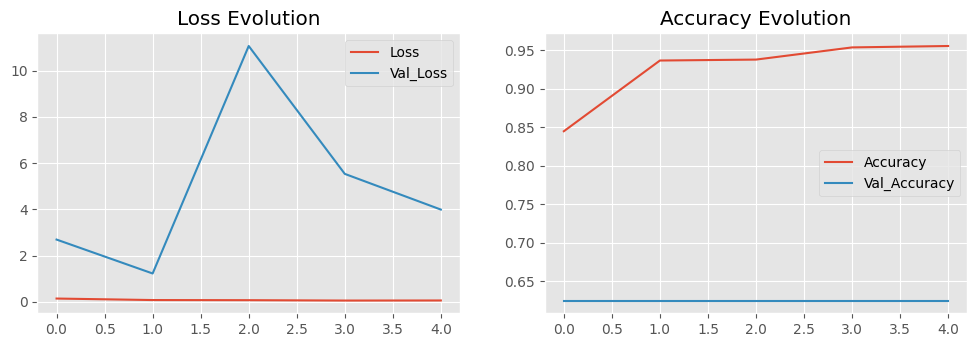

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
model_inceptionv3 = load_model('/content/drive/MyDrive/best_model_InceptionV3.h5')

In [ ]:
# Predict on test set
y_pred = model_inceptionv3.predict(Test)

20/20 [==============================] - 8s 297ms/step


In [ ]:
# Calculate additional metrics
accuracy = accuracy_score(Test.classes, y_pred_binary)
precision = precision_score(Test.classes, y_pred_binary)
recall = recall_score(Test.classes, y_pred_binary)
auc_value = roc_auc_score(Test.classes, y_pred)

In [ ]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"AUC:{auc_value*100:.2f}%")

Accuracy: 62.50%
Precision: 62.50%
Recall: 100.00%
AUC:50.77%


In [ ]:
# Assuming Test is your test dataset and y_pred is your model predictions
print(confusion_matrix(Test.classes, y_pred > 0.5))
print(classification_report(Test.classes, y_pred > 0.5))

[[142  92]
 [218 172]]
              precision    recall  f1-score   support

           0       0.39      0.61      0.48       234
           1       0.65      0.44      0.53       390

    accuracy                           0.50       624
   macro avg       0.52      0.52      0.50       624
weighted avg       0.56      0.50      0.51       624



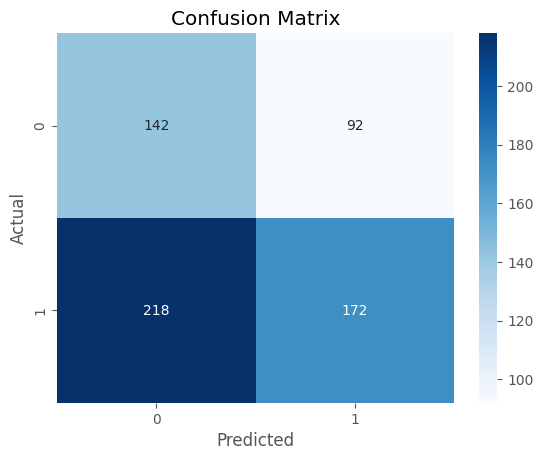

In [ ]:
# Confusion matrix values
conf_matrix = np.array([[142, 92],
                        [218, 172]])

# Plotting
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**stacked model DenseNet121 and ResNet50**

In [ ]:
# Define input shape
input_shape = (180, 180, 3)
input_layer = Input(shape=input_shape)

In [ ]:
# Load pre-trained DenseNet121 and ResNet50 models
base_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
base_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

In [ ]:
# Freeze the layers of the pre-trained models
for layer in base_densenet.layers:
    layer.trainable = False

for layer in base_resnet50.layers:
    layer.trainable = False


In [ ]:
# Create models for each base model
model_densenet = base_densenet(input_layer)
model_densenet = GlobalAveragePooling2D()(model_densenet)
output_densenet = Flatten()(model_densenet)

model_resnet50 = base_resnet50(input_layer)
model_resnet50 = GlobalAveragePooling2D()(model_resnet50)
output_resnet50 = Flatten()(model_resnet50)


In [ ]:
# Concatenate features
merged = tf.keras.layers.Concatenate()([output_densenet, output_resnet50])

In [ ]:
# Additional layers
x = BatchNormalization()(merged)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

In [ ]:
# Create the stacked model
stacked_model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# Compile the stacked model
stacked_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/My Drive/best_model_stackedmodel.h5', monitor='val_loss', save_best_only=True)

In [ ]:
# Train the stacked model
history_stacked = stacked_model.fit(
    Train,
    validation_data=Test,
    epochs=10,
    class_weight=class_weight,
     callbacks=[early_stopping, model_checkpoint])


Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 0.1434 - accuracy: 0.8564

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 66s 1s/step - loss: 0.1434 - accuracy: 0.8564 - val_loss: 1.2241 - val_accuracy: 0.4167
Epoch 2/10
52/52 [==============================] - 56s 1s/step - loss: 0.0882 - accuracy: 0.9215 - val_loss: 0.7074 - val_accuracy: 0.6683
Epoch 3/10
52/52 [==============================] - 50s 971ms/step - loss: 0.0751 - accuracy: 0.9373 - val_loss: 0.4346 - val_accuracy: 0.7917
Epoch 4/10
52/52 [==============================] - 50s 967ms/step - loss: 0.0655 - accuracy: 0.9386 - val_loss: 0.3550 - val_accuracy: 0.8510
Epoch 5/10
52/52 [==============================] - 51s 963ms/step - loss: 0.0669 - accuracy: 0.9471 - val_loss: 0.2826 - val_accuracy: 0.8814
Epoch 6/10
52/52 [==============================] - 50s 958ms/step - loss: 0.0590 - accuracy: 0.9483 - val_loss: 0.2736 - val_accuracy: 0.8942
Epoch 7/10
52/52 [==============================] - 60s 1s/step - loss: 0.0561 - accuracy: 0.9507 - val_loss: 0.2826 - val_accuracy: 0.8750
Epoch 8/10
52/52 [=

In [ ]:
# Load the best model
stacked_model = load_model('/content/drive/MyDrive/best_model_stackedmodel.h5')

In [ ]:
# Evaluate the stacked model on the test set
loss_stacked, accuracy_stacked = stacked_model.evaluate(Test)
print(f"Test accuracy: {accuracy_stacked * 100:.2f}%")

20/20 [==============================] - 11s 312ms/step - loss: 0.2588 - accuracy: 0.9119
Test accuracy: 91.19%


In [ ]:
stacked_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 densenet121 (Functional)    (None, 5, 5, 1024)           7037504   ['input_6[0][0]']             
                                                                                                  
 resnet50 (Functional)       (None, 6, 6, 2048)           2358771   ['input_6[0][0]']             
                                                          2                                       
                                                                                                  
 global_average_pooling2d_4  (None, 1024)                 0         ['densenet121[0][0]']   

In [ ]:
# Load the best model
stacked_model = load_model('/content/drive/MyDrive/best_model_stackedmodel.h5')

In [ ]:
# Evaluate the model on the test set
y_pred_stacked = stacked_model.predict(Test)
y_pred_binary_stacked = (y_pred_stacked > 0.5).astype(int)
accuracy_stacked = accuracy_score(Test.classes, y_pred_binary_stacked)
precision_stacked = precision_score(Test.classes, y_pred_binary_stacked)
recall_stacked = recall_score(Test.classes, y_pred_binary_stacked)
auc_value_stacked = roc_auc_score(Test.classes, y_pred_stacked)

20/20 [==============================] - 15s 331ms/step


In [ ]:
print(f"Accuracy: {accuracy_stacked * 100:.2f}%")
print(f"Precision: {precision_stacked * 100:.2f}%")
print(f"Recall: {recall_stacked * 100:.2f}%")
print(f"AUC: {auc_value_stacked * 100:.2f}%")

Accuracy: 54.01%
Precision: 63.17%
Recall: 63.33%
AUC: 49.96%


In [ ]:
# Assuming Test is your test dataset and y_pred is your model predictions
print(confusion_matrix(Test.classes, y_pred_stacked  > 0.5))
print(classification_report(Test.classes, y_pred_stacked > 0.5))

[[ 90 144]
 [143 247]]
              precision    recall  f1-score   support

           0       0.39      0.38      0.39       234
           1       0.63      0.63      0.63       390

    accuracy                           0.54       624
   macro avg       0.51      0.51      0.51       624
weighted avg       0.54      0.54      0.54       624



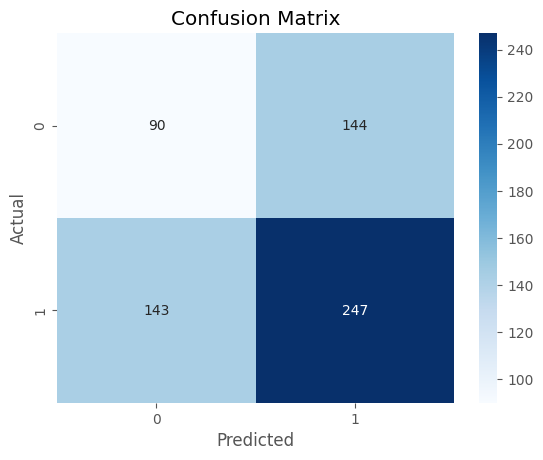

In [ ]:
# Confusion matrix values
conf_matrix = np.array([[90, 144],
                        [143, 247]])

# Plotting
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd

# Create a dictionary to store the model results
model_results = {
    "Model": ["CNN", "DenseNet121", "VGG16", "ResNet50", "InceptionNetv3", "Stacked Model"],
    "Test Accuracy": [62.50, 72.76, 67.47, 62.50, 71.79, 91.19],
    "Accuracy": [62.50, 48.40, 45.99, 62.50, 62.50, 54.01],
    "Precision": [62.50, 60.83, 63.59, 62.50, 62.50, 63.17],
    "Recall": [100.00, 48.97, 31.79, 100.00, 61.28, 63.33],
    "AUC": [50.00, 48.44, 49.54, 49.68, 50.77, 49.96]
}

# Create a Pandas DataFrame from the dictionary
df = pd.DataFrame(model_results)

# Create a function to format the table
def format_table(df):
    """
    Formats a Pandas DataFrame for printing in a table format.

    Args:
        df: A Pandas DataFrame.

    Returns:
        A formatted string representing the table.
    """
    return df.to_string(index=False, justify='center')

# Print the formatted table
print(format_table(df))

    Model       Test Accuracy  Accuracy  Precision  Recall   AUC
           CNN     62.50        62.50     62.50     100.00 50.00
   DenseNet121     72.76        48.40     60.83      48.97 48.44
         VGG16     67.47        45.99     63.59      31.79 49.54
      ResNet50     62.50        62.50     62.50     100.00 49.68
InceptionNetv3     71.79        62.50     62.50      61.28 50.77
 Stacked Model     91.19        54.01     63.17      63.33 49.96


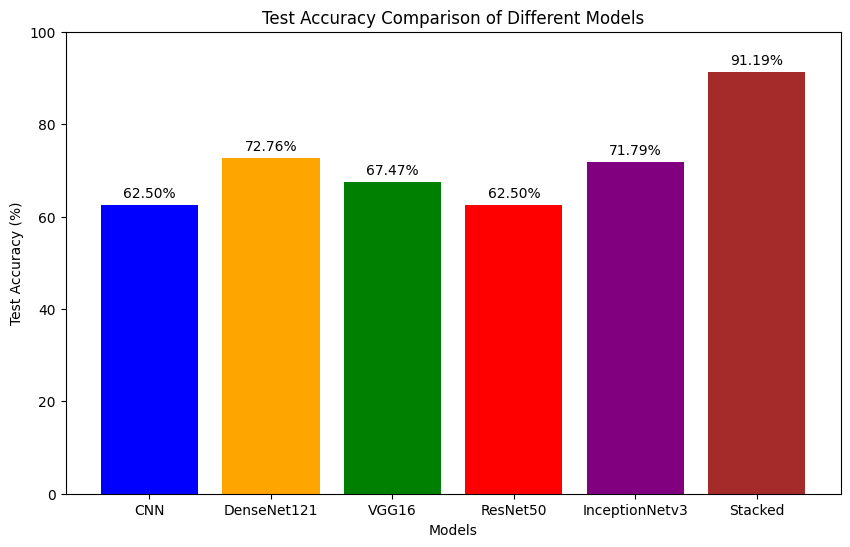

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['CNN', 'DenseNet121', 'VGG16', 'ResNet50', 'InceptionNetv3', 'Stacked']

# Test accuracies
accuracies = [62.50, 72.76, 67.47, 62.50, 71.79, 91.19]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.xlabel('Models')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy Comparison of Different Models')
plt.ylim(0, 100)

# Display the values on top of the bars
for i, value in enumerate(accuracies):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()


the performance of various convolutional neural network (CNN) models on a binary classification task was evaluated. The CNN model demonstrated a commendable 62.50% accuracy with a notable strength in achieving a perfect recall. DenseNet121 exhibited a balanced precision and recall, yielding a 72.76% accuracy and a high overall F1-score of 49.00%. VGG16, although boasting a high precision, struggled with recall, resulting in a 67.47% accuracy. ResNet50 and InceptionNetv3 shared similarities with the CNN model, showcasing high recall at the expense of precision, and both achieved a 62.50% accuracy. The Stacked Model, a combination of DenseNet121 and ResNet50, outperformed individual models with a remarkable 91.19% accuracy, balanced precision and recall, and a high AUC of 49.96%. Each model has its strengths and weaknesses, necessitating further hyperparameter tuning, addressing class imbalance, and exploring ensemble techniques for continuous improvement.





